#  Netflix Movies and TV Shows Analysis
**Technologies**: *Python, NumPy, Pandas, Matplotlib, Seaborn*

###  Project Objectives:
- Analyze trends in content distribution (Movies vs TV Shows)
- Explore genres, release years, and country-wise production
- Clean and preprocess the dataset
- Visualize key trends and patterns


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')        
sns.set_palette('tab10') 

***Load Dataset***

In [21]:
df = pd.read_csv("netflix_titles.csv")



***Data Overview***

In [22]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [14]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [15]:
df.shape

(8807, 12)

In [17]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [19]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [20]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

***Missing Values***

In [25]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

***Converting Datatype of Date_Added Coloumn***

In [32]:
#From object to datetime64
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [33]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Data Cleaning

***Handling Missing Values***

In [34]:
df.fillna({'director':'Unavailable','cast':'Unavailable','country':'Unavailable','rating':'Unavailable'},inplace=True)
df.isna().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      98
release_year     0
rating           0
duration         3
listed_in        0
description      0
dtype: int64

***Missing date_added is to be substituted by the most recent date from date_added***

In [37]:
df[df.date_added.isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,Unavailable,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaT,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6079,s6080,TV Show,Abnormal Summit,"Jung-ah Im, Seung-uk Jo","Hyun-moo Jun, Si-kyung Sung, Se-yoon Yoo",South Korea,NaT,2017,TV-PG,2 Seasons,"International TV Shows, Korean TV Shows, Stand...","Led by a trio of Korean celebs, a multinationa..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,Unavailable,Anthony Bourdain,United States,NaT,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6177,s6178,TV Show,忍者ハットリくん,Unavailable,Unavailable,Japan,NaT,2012,TV-Y7,2 Seasons,"Anime Series, Kids' TV","Hailing from the mountains of Iga, Kanzo Hatto..."
6213,s6214,TV Show,Bad Education,Unavailable,"Jack Whitehall, Mathew Horne, Sarah Solemani, ...",United Kingdom,NaT,2014,TV-MA,3 Seasons,"British TV Shows, TV Comedies","A history teacher at the posh Abbey Grove, Alf..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8539,s8540,TV Show,The Tudors,Unavailable,"Jonathan Rhys Meyers, Henry Cavill, James Frai...","Ireland, Canada, United States, United Kingdom",NaT,2010,TV-MA,4 Seasons,TV Dramas,All the splendor and scandal of England's 16th...
8557,s8558,TV Show,The West Wing,Unavailable,"Martin Sheen, Rob Lowe, Allison Janney, John S...",United States,NaT,2005,TV-14,7 Seasons,TV Dramas,This powerful political epic chronicles the tr...
8684,s8685,TV Show,Vroomiz,Unavailable,"Joon-seok Song, Jeong-hwa Yang, Sang-hyun Um, ...",South Korea,NaT,2016,TV-Y,3 Seasons,"Kids' TV, Korean TV Shows","For these half-car, half-animal friends, each ..."
8712,s8713,TV Show,Weird Wonders of the World,Unavailable,Chris Packham,United Kingdom,NaT,2016,TV-PG,2 Seasons,"British TV Shows, Docuseries, Science & Nature TV",From animal oddities and bizarre science to me...


In [38]:
most_recent=df['date_added'].max()
df.fillna({'date_added':most_recent},inplace=True)

***Checking the filled date through show_id***

In [39]:
df[df.show_id=='s6067']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,Unavailable,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,2021-09-25,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


***Handling Durations Data Input Error***

In [40]:
df[df.duration.isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


***Making sure there is no other content with the same director***

In [44]:
df[df.director=='Louis C.K.'].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


***OverWrite and Check***

In [45]:
#loc helps us to easily access the coloumns by name
df.loc[df.director=='Louis C.K.','duration']=df['rating']
df[df.director=='Louis C.K.'].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,66 min,Movies,The comic puts his trademark hilarious/thought...


***Second OverWrite and Check***

In [47]:
df.loc[df.director=='Louis C.K.','rating']='Unavailable'
df[df.director=='Louis C.K.'].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,Unavailable,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,Unavailable,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,Unavailable,66 min,Movies,The comic puts his trademark hilarious/thought...


## Data Visualization


***Types of Shows that has been watched on Netlifx***

In [48]:
#value_counts shows the counts of different categories in a given coloumn
df.type.value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

Text(0.5, 1.0, 'Count Vs Type of Shows')

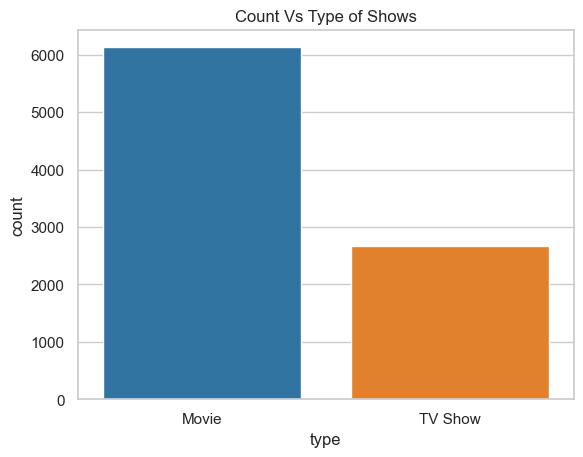

In [107]:
#countplot helps us to plot counts of each category
sns.countplot(x='type', hue='type',palette='tab10', data=df,legend=False)
plt.title('Count Vs Type of Shows')

**On Netflix there are more No of Movies than TV Shows**

### *Country Analysis*

In [82]:
df['country'].value_counts().head(10)

country
United States     2818
India              972
Unavailable        831
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: count, dtype: int64

Text(0.5, 1.0, 'Country Wise Content on Netflix')

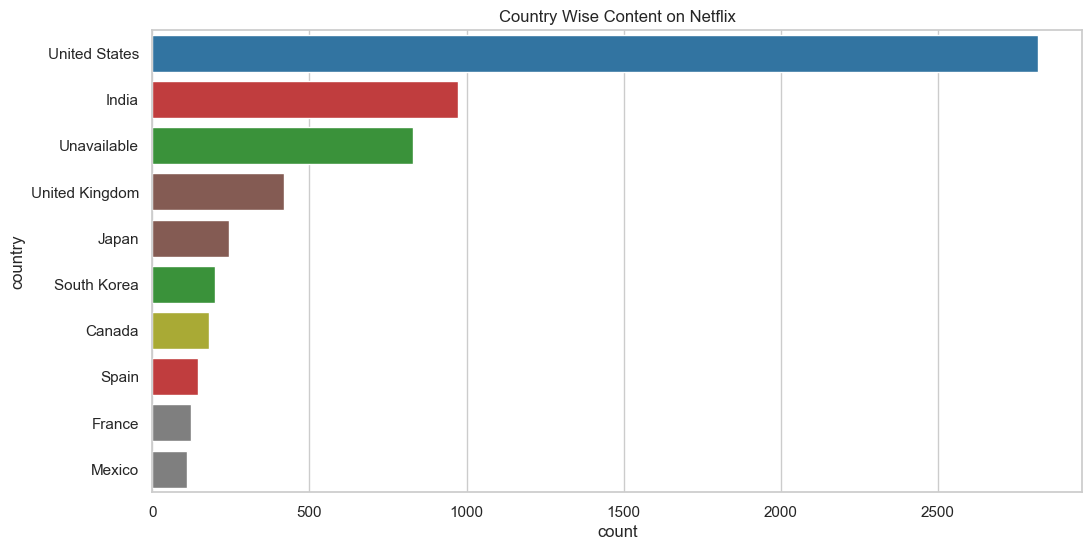

In [106]:
plt.figure(figsize=(12,6))
sns.countplot(y='country',hue='country',palette='tab10',order=df['country'].value_counts().index[0:10],data=df,legend=False)
plt.title('Country Wise Content on Netflix')

 ***Type of Content based on Country***

In [84]:
plt.figure(figsize=(12,6))
movie=df[df['type']=='Movie']
tv_shows=df[df['type']=='TV Show']

<Figure size 1200x600 with 0 Axes>

Text(0.5, 1.0, 'Top 10 Countries producing TV Shows in Netflix')

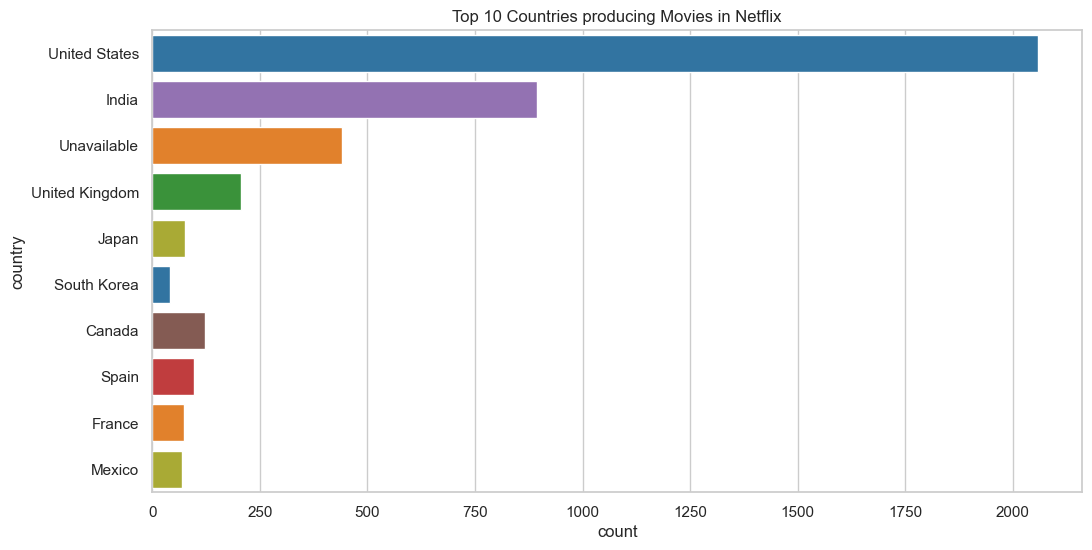

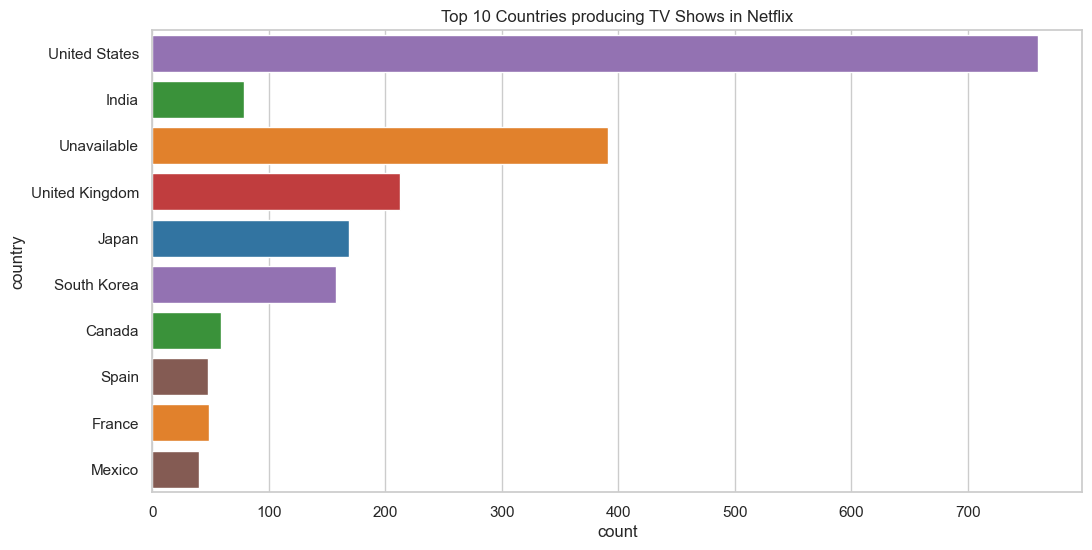

In [105]:
plt.figure(figsize=(12,6))
sns.countplot(y='country',hue='country',palette='tab10',order=df['country'].value_counts().index[0:10],data=movie,legend=False)
plt.title('Top 10 Countries producing Movies in Netflix')

plt.figure(figsize=(12,6))
sns.countplot(y='country',hue='country',palette='tab10',order=df['country'].value_counts().index[0:10],data=tv_shows,legend=False)
plt.title('Top 10 Countries producing TV Shows in Netflix')

### *Major Ratings given to the Netflix Shows*

In [88]:
df.rating.value_counts()

rating
TV-MA          3207
TV-14          2160
TV-PG           863
R               799
PG-13           490
TV-Y7           334
TV-Y            307
PG              287
TV-G            220
NR               80
G                41
Unavailable       7
TV-Y7-FV          6
NC-17             3
UR                3
Name: count, dtype: int64

Text(0.5, 1.0, 'Rating of Netflix Shows VS Count')

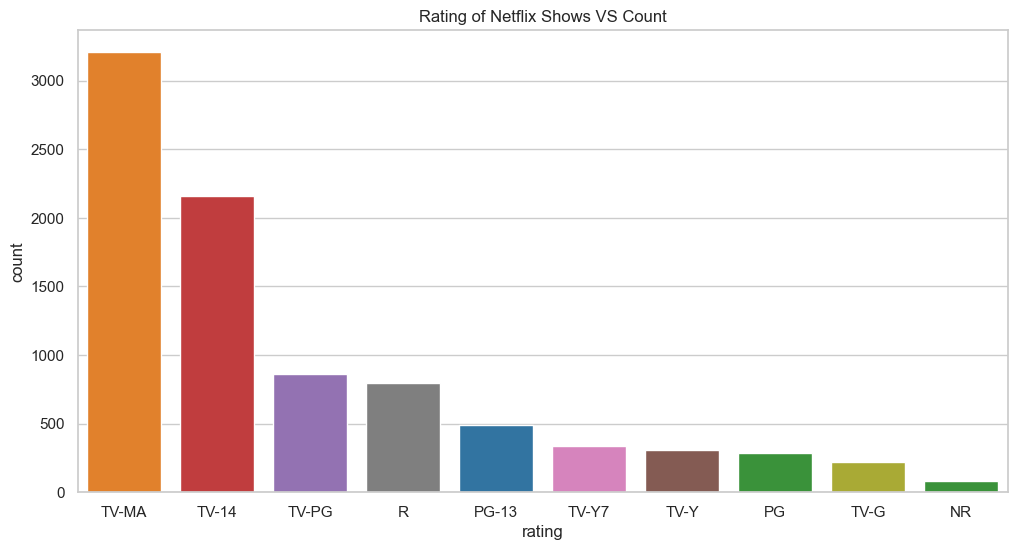

In [104]:
 plt.figure(figsize=(12,6))
sns.countplot(x='rating',hue='rating',palette='tab10',order=df['rating'].value_counts().index[0:10],data=df,legend=False)
plt.title('Rating of Netflix Shows VS Count')

**Most of the Shows has TV-MA and TV-14 ratings**

### *Released Years of the Content produced by Netflix*

In [93]:
#Top 20 Released years 
df.release_year.value_counts()[:20]

release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
2021     592
2015     560
2014     352
2013     288
2012     237
2010     194
2011     185
2009     152
2008     136
2006      96
2007      88
2005      80
2004      64
2003      61
2002      51
Name: count, dtype: int64

Text(0.5, 1.0, 'Count Release in Years on Netflix Shows VS Count')

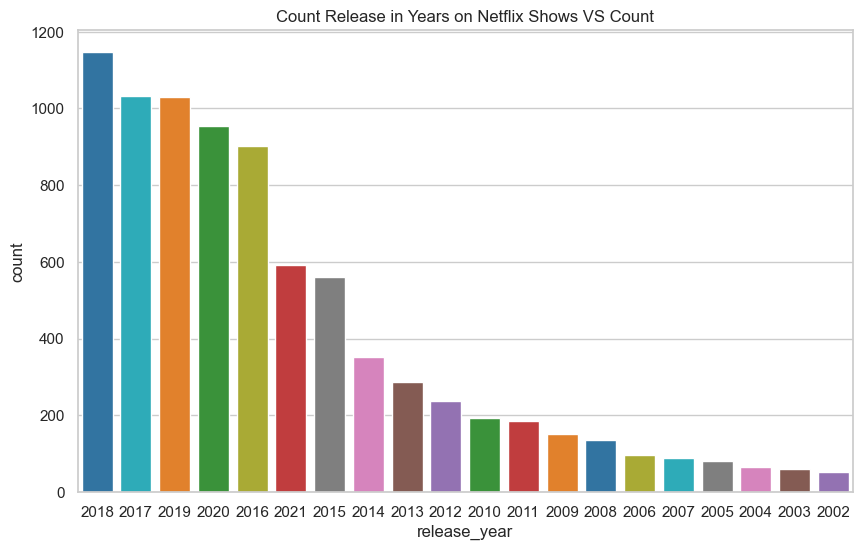

In [103]:
plt.figure(figsize=(10,6))
sns.countplot(x='release_year',hue='release_year',palette='tab10',order=df['release_year'].value_counts().index[0:20],data=df,legend=False)
plt.title('Count Release in Years on Netflix Shows VS Count')

### *Popular Genre Analysis*

Text(0.5, 1.0, 'Top 20 Genres on Netflix')

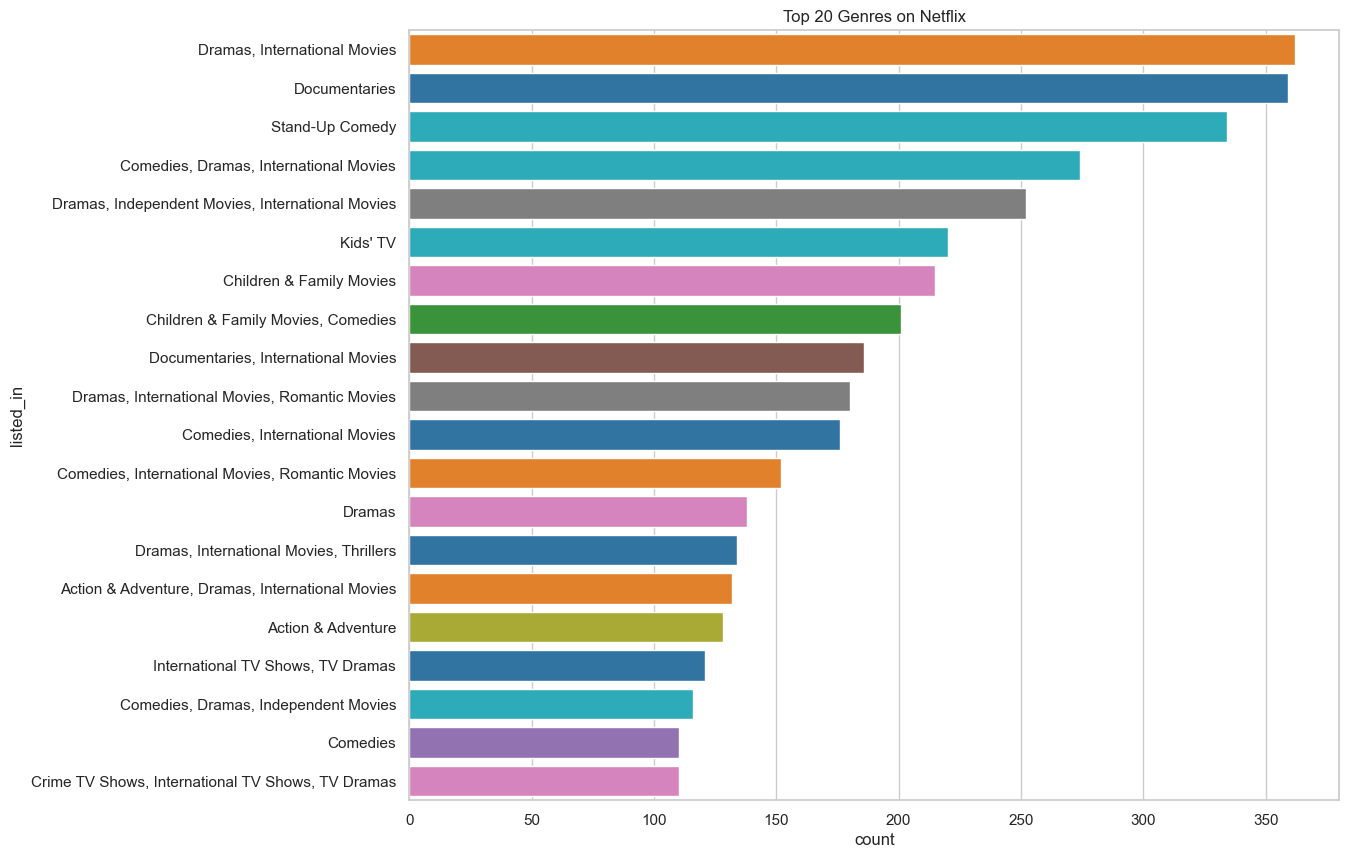

In [117]:
plt.figure(figsize=(12,10))
sns.countplot(y='listed_in',hue='listed_in',palette='tab10',order=df['listed_in'].value_counts().index[0:20],data=df,legend=False)
plt.title('Top 20 Genres on Netflix')

###  **Summary**

In this exploratory data analysis (EDA) project, we performed various operations on the Netflix dataset to uncover meaningful patterns and trends. Below are the key insights derived from the analysis:

- **Netflix has more _Movies_ than _TV Shows_**, indicating a greater focus on movie content.
- **The _United States_ is the top producer of Netflix content**, followed by **_India_**, which ranks second in terms of total titles.
- **Most of the content on Netflix is intended for _Mature Audiences_**, reflecting a strong preference for adult-oriented programming.
- **The year _2018_ had the highest number of content releases**, making it the most active year for Netflix additions.
- **"_International Movies_" and "_Dramas_" are the most prominent genres** on Netflix, highlighting the platform’s global reach and the popularity of narrative-driven content.
